# Serie V - Dominio de Aprendizaje Supervisado por Regresión

In [2]:
! pip3 install pandas

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [3]:
! pip3 install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [4]:
! pip3 install numpy

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [5]:
! pip3 install matplotlib

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


## E501 - Regresión lineal

Dado un DataFrame, selecciona las columnas de análisis (1 o más) y forma la matriz X con los valores numéricos de las características (columnas seleccionadas).

In [6]:
import pandas as pd
import os
from os.path import dirname

cwd = dirname(os.getcwd())
red_wine_df = pd.read_csv(f"{cwd}/datasets/winequality-red.csv", sep=";")
display(red_wine_df)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [7]:
analysis_columns = ["fixed acidity", "volatile acidity", "citric acid", "pH", "alcohol"]
X = red_wine_df[analysis_columns]
X

,fixed acidity,volatile acidity,citric acid,pH,alcohol
0,7.4,0.700,0.00,3.51,9.4
1,7.8,0.880,0.00,3.20,9.8
2,7.8,0.760,0.04,3.26,9.8
3,11.2,0.280,0.56,3.16,9.8
4,7.4,0.700,0.00,3.51,9.4
...,...,...,...,...,...
1594,6.2,0.600,0.08,3.45,10.5
1595,5.9,0.550,0.10,3.52,11.2
1596,6.3,0.510,0.13,3.42,11.0
1597,5.9,0.645,0.12,3.57,10.2


Selecciona una columna adicional que será el objetivo a aprender, esta columna debe tener valores continuos (no categóricos). Y extrae los valores como y.

In [8]:
target = "quality"
y = red_wine_df[target]
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

Crea un regresor lineal usando los modelos lineal y ajusta la matriz X y el vector y al regresor.

In [9]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X, y)

LinearRegression()

Obtén el indicador score para X y y.

In [10]:
reg.score(X, y)

0.32662545415489586

##  E502 - Predicción de valores en la regresión lineal

Crea una regresión lineal sobre una sola variable y predice los valores que tendría todo un eje de datos.

Por ejemplo, si el eje x es ESTATURA y el eje y es PESO, entonces predice todos pesos para los valores para estaturas desde 1.0 hasta los 2.0 metros.

In [11]:
import numpy as np

X1 = red_wine_df["alcohol"].values.reshape(-1, 1)
y1 = red_wine_df["quality"].values.reshape(-1, 1)

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X1, y1)

alcohol_range = np.linspace(X1.min(), X1.max()).reshape(-1, 1)
quality_prediction = reg.predict(alcohol_range)

Visualiza los puntos reales y las predicciones en una misma gráfica.

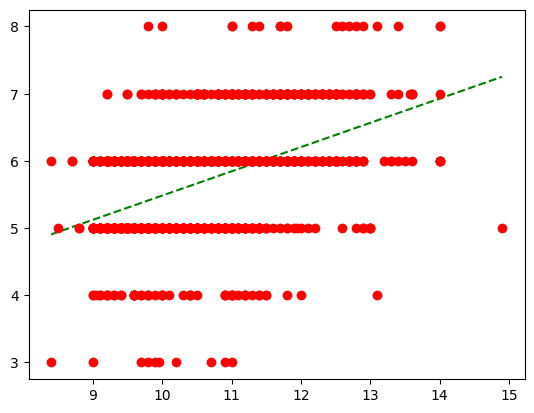

In [12]:
import matplotlib.pyplot as plt

plt.plot(alcohol_range, quality_prediction, "g--")
plt.plot(X1, y1, "ro")
plt.show()

## E503 - Regresión lineal multivariable

Crea una regresión lineal sobre dos variables y visualiza el plano de los valores de predicción.

Por ejemplo, si el eje x1 es PRECIO, el eje x2 es EXISTENCIAS, y el eje y es DEMANDA, entonces visualiza los puntos en 3 dimensiones para diferentes precios, existencias y demandas de productos.

Luego genera las predicciones para los precios desde el menor hasta el mayor de 0.5 en 0.5 y las existencias desde 0 hasta la máxima existencia de 1 en 1. Por último deberías graficar en 3 dimensiones el plano y los puntos reales para visualizar que tanto se aproxima el plano de predicción a los valores reales.

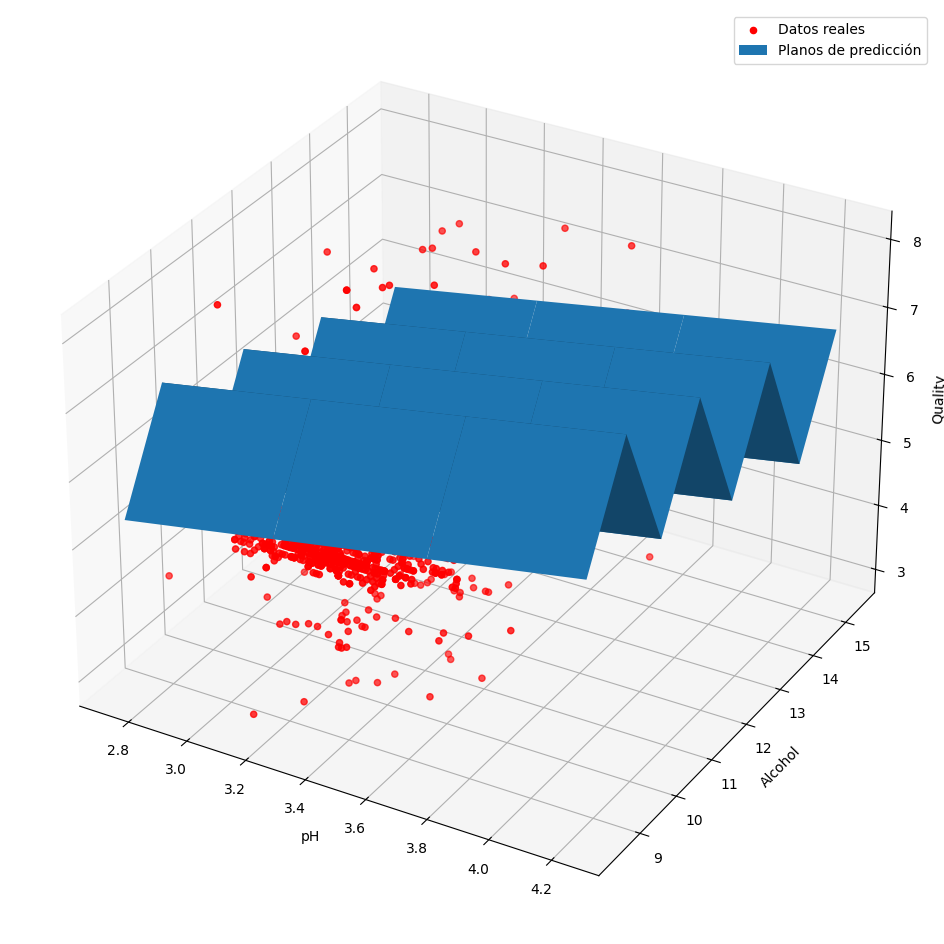

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression

X2 = red_wine_df[["pH", "alcohol"]].values
y2 = red_wine_df["quality"].values

reg = LinearRegression()
reg.fit(X2, y2)

pH_range = np.arange(X2[:, 0].min(), X2[:, 0].max() + 0.5, 0.5)
alcohol_range = np.arange(X2[:, 1].min(), X2[:, 1].max() + 1, 1)

predictions = []
for ph in pH_range:
    for alc in alcohol_range:
        predictions.append([ph, alc, reg.predict([[ph, alc]])[0]])

predictions = np.array(predictions)
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(X2[:, 0], X2[:, 1], y2, c='red', label='Datos reales')
ph_grid, alcohol_grid = np.meshgrid(pH_range, alcohol_range)
predicted_values = np.array(predictions[:, 2]).reshape(len(alcohol_range), -1)
ax.plot_surface(ph_grid, alcohol_grid, predicted_values, label='Planos de predicción')
ax.set_xlabel('pH')
ax.set_ylabel('Alcohol')
ax.set_zlabel('Quality')
plt.legend()
plt.show()